<a href="https://colab.research.google.com/github/umbutun/hands-on-machine-learning-practice/blob/main/notebooks/chapter_09_intro_nn/chapter_09_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 9 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 9._

# Setup

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's  define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [4]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')


IMAGES_PATH = Path("/content/drive/My Drive/Colab Notebooks/hands-on-ml/ch9-images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Mounted at /content/drive


# From Biological to Artificial Neurons
## The Perceptron

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [6]:
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

This code cell demonstrates that the `Perceptron` classifier from `sklearn.linear_model` is essentially a specific configuration of the `SGDClassifier`. Here's a breakdown:

*   **`from sklearn.linear_model import SGDClassifier`**: Imports the `SGDClassifier` class.
*   **`sgd_clf = SGDClassifier(...)`**: Initializes an `SGDClassifier` with the following parameters:
    *   `loss="perceptron"`: Specifies that the perceptron loss function should be used, making it behave like a Perceptron.
    *   `penalty=None`: Disables regularization, which is also characteristic of a basic Perceptron.
    *   `learning_rate="constant"`: Sets a constant learning rate.
    *   `eta0=1`: Sets the initial learning rate to 1.
*   **`sgd_clf.fit(X, y)`**: Trains the `SGDClassifier` using the same `X` (petal length and width) and `y` (Iris setosa) data that was used for the `Perceptron`.
*   **`assert (sgd_clf.coef_ == per_clf.coef_).all()`** and **`assert (sgd_clf.intercept_ == per_clf.intercept_).all()`**: These assertions verify that the coefficients (`coef_`) and intercepts (`intercept_`) learned by the `SGDClassifier` are identical to those learned by the `Perceptron` classifier, confirming their equivalence under these specific settings.

In [7]:
# extra code – shows how to build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

This code cell is responsible for visualizing the decision boundary learned by the Perceptron classifier on the Iris dataset. It generates a 2D plot showing the two features (petal length and petal width) and how the Perceptron separates the 'Iris setosa' class from others.

Here's a breakdown of the code:

*   **`a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]`** and **`b = -per_clf.intercept_ / per_clf.coef_[0, 1]`**: These lines calculate the slope (`a`) and y-intercept (`b`) of the decision boundary line. For a linear classifier like the Perceptron, the decision boundary is a straight line defined by the equation `w0*x0 + w1*x1 + b = 0`, which can be rearranged to `x1 = (-w0/w1)*x0 - (b/w1)`.
*   **`x0, x1 = np.meshgrid(...)`**: Creates a grid of points across the feature space using `np.meshgrid`. This grid will be used to predict the class for each point, allowing for the plotting of the decision regions.
*   **`X_new = np.c_[x0.ravel(), x1.ravel()]`**: Flattens the meshgrid points and combines them into a single array, suitable for prediction by the classifier.
*   **`y_predict = per_clf.predict(X_new)`**: Uses the trained Perceptron (`per_clf`) to predict the class (`True` or `False` for Iris setosa) for each point in the `X_new` grid.
*   **`zz = y_predict.reshape(x0.shape)`**: Reshapes the predictions back into the grid format for `contourf` plotting.
*   **`plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", ...)`** and **`plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", ...)`**: Plots the actual data points. 'Not Iris setosa' points are shown as blue squares, and 'Iris setosa' points are shown as yellow circles.
*   **`plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", ...)`**: Plots the calculated decision boundary line in black.
*   **`plt.contourf(x0, x1, zz, cmap=custom_cmap)`**: Fills the regions of the plot according to the predictions (`zz`) made by the Perceptron, using the `custom_cmap`.


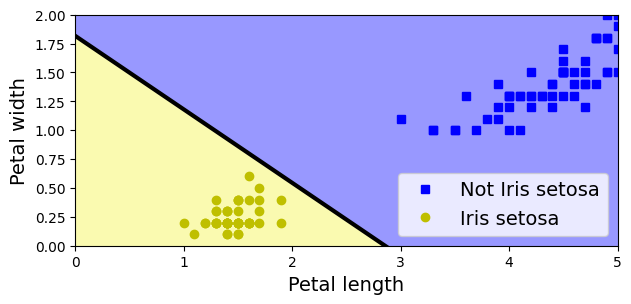

In [8]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

**Activation functions**

This code cell generates Figure 9-8, which visually compares several common activation functions used in neural networks along with their derivatives. Here's a detailed breakdown:

*   **Function Definitions:**
    *   `from scipy.special import expit as sigmoid`: Imports the sigmoid function from SciPy, aliasing it as `sigmoid`.
    *   `def relu(z): return np.maximum(0, z)`: Defines the Rectified Linear Unit (ReLU) activation function, which returns `z` if `z > 0` and `0` otherwise.
    *   `def derivative(f, z, eps=0.000001): return (f(z + eps) - f(z - eps)) / (2 * eps)`: Defines a numerical approximation for the derivative of a function `f` at point `z` using the central difference method. `eps` is a small value used to compute the difference.

*   **Data Generation:**
    *   `max_z = 2.5`: Sets the maximum value for the input `z` range.
    *   `z = np.linspace(-max_z, max_z, 200)`: Creates an array of 200 evenly spaced values for `z` between `-max_z` and `max_z`. This `z` array will be used as input to the activation functions.

*   **Plot Setup:**
    *   `fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))`: Creates a figure and a 2x4 grid of subplots (`axes`). The first row will display the activation functions, and the second row will display their derivatives.

*   **Plotting Activation Functions and Derivatives:** The code then iterates through four different activation functions:
    *   **Heaviside (Step Function):**
        *   The first row, first column (`axes[0, 0]`) plots a manual representation of the Heaviside step function: 0 for `z <= 0` and 1 for `z > 0`.
        *   The second row, first column (`axes[1, 0]`) plots the derivative of the Heaviside function (which is 0 everywhere except at `z=0`, where it's undefined; numerically, it's plotted as 0).
    *   **ReLU:**
        *   `axes[0, 1].plot(z, relu(z), "g-", linewidth=2)`: Plots the ReLU function.
        *   `axes[1, 1]` plots the derivative of ReLU (0 for `z < 0` and 1 for `z > 0`).
    *   **Sigmoid:**
        *   `axes[0, 2].plot(z, sigmoid(z), "r-", linewidth=2)`: Plots the sigmoid function.
        *   `axes[1, 2]` plots its derivative using the `derivative` helper function.
    *   **Tanh (Hyperbolic Tangent):**
        *   `axes[0, 3].plot(z, np.tanh(z), "b-", linewidth=1)`: Plots the hyperbolic tangent function.
        *   `axes[1, 3]` plots its derivative using the `derivative` helper function.

*   **Plot Customization (Loop):**
    *   The nested `for` loops customize the appearance of each subplot, setting grid, removing x-tick labels for the first row, adjusting x-axis limits, and selectively removing y-tick labels for cleaner presentation.


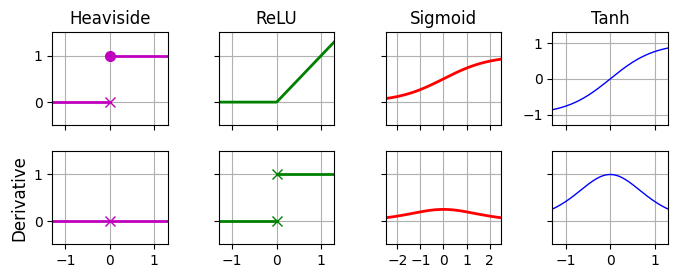

In [9]:
# extra code – this cell generates Figure 9–8

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

max_z = 2.5
z = np.linspace(-max_z, max_z, 200)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))

axes[0, 0].plot([-max_z, 0], [0, 0], "m-", linewidth=2)
axes[0, 0].plot(0, 0, "mx", markersize=7)
axes[0, 0].plot(0, 1, "mo", markersize=7)
axes[0, 0].plot([0, max_z], [1, 1], "m-", linewidth=2)
axes[0, 0].set_title("Heaviside", fontsize=12)
axes[1, 0].plot(z, derivative(np.sign, z), "m-", linewidth=2)
axes[1, 0].plot(0, 0, "mx", markersize=7)
axes[1, 0].set_ylabel("Derivative", fontsize=12)

axes[0, 1].plot(z, relu(z), "g-", linewidth=2)
axes[0, 1].set_title("ReLU", fontsize=12)
axes[1, 1].plot([-max_z, 0], [0, 0], "g-", linewidth=2)
axes[1, 1].plot([0, max_z], [1, 1], "g-", linewidth=2)
axes[1, 1].plot(0, 0, "gx", markersize=7)
axes[1, 1].plot(0, 1, "gx", markersize=7)

axes[0, 2].plot(z, sigmoid(z), "r-", linewidth=2)
axes[0, 2].set_title("Sigmoid", fontsize=12)
axes[1, 2].plot(z, derivative(sigmoid, z), "r-", linewidth=2)

axes[0, 3].plot(z, np.tanh(z), "b-", linewidth=1)
axes[0, 3].set_title("Tanh", fontsize=12)
axes[1, 3].plot(z, derivative(np.tanh, z), "b-", linewidth=1)

for row in range(2):
    for col in range(4):
        axes[row, col].grid(True)
        if row == 0:
            axes[row, col].set_xticklabels([])
        if col == 2:
            axes[row, col].set_xlim(-max_z, max_z)
            axes[row, col].set_xticks([-2, -1, 0, 1, 2])
        else:
            axes[row, col].set_xlim(-1.3, 1.3)
            axes[row, col].set_xticks([-1, 0, 1])
        if col != 0 and ((row, col) != (0, 3)):
            axes[row, col].set_yticklabels([])
        if (row, col) == (0, 3):
            axes[row, col].set_ylim(-1.3, 1.3)
            axes[row, col].set_yticks([-1, 0, 1])
        else:
            axes[row, col].set_ylim(-0.5, 1.5)
            axes[row, col].set_yticks([0, 1])
save_fig("activation_functions_and_derivative")
plt.show()

# Building and Training MLPs with Scikit-Learn
## Regression MLPs

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

In [12]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], early_stopping=True,
                       verbose=True, random_state=42)

In [13]:
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=[50, 50, 50], random_state=42,
                              verbose=True))])

In [14]:
mlp_reg.best_validation_score_

0.791536125425778

In [15]:
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

In [16]:
rmse

0.5327699946812925

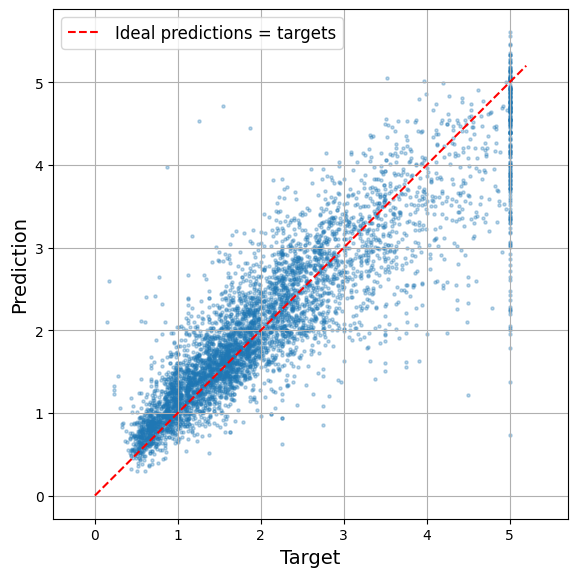

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=5, alpha=0.3)
plt.plot([0, 5.2], [0, 5.2], color='red', linestyle='--',
         label="Ideal predictions = targets")
plt.axis("equal")
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.legend(fontsize=12)
plt.grid()
save_fig("MLP_predictions_vs_targets")
plt.show()

## Classification MLPs

In [18]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)

In [19]:
X_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
X_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]

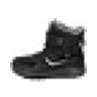

In [20]:
X_sample = X_train[0].reshape(28, 28)  # first image in the training set
plt.figure(figsize=(1,1))  # extra code – reduce the figure size
plt.imshow(X_sample, cmap="binary")
plt.axis('off')  # extra code – remove the axis
plt.show()

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
class_names[y_train[0]]

'Ankle boot'

This code cell generates Figure 9-11, which visually displays a grid of sample images from the Fashion MNIST dataset, organized by class.

Here's a breakdown of the code:

*   **`n_rows = 4`**: Defines the number of rows for the grid of images.
*   **`plt.figure(figsize=(12, n_rows * 1.2))`**: Creates a new Matplotlib figure with a specified size suitable for the grid.
*   **`for row in range(n_rows):`**: The outer loop iterates through each row of the image grid.
*   **`for class_index in range(10):`**: The inner loop iterates through each of the 10 Fashion MNIST classes (0-9).
    *   **`X_img = X_train[y_train==class_index][row].reshape(28, 28)`**: This line selects a specific image from the training data. It filters `X_train` for images belonging to the current `class_index`, then picks the `row`-th image from that filtered subset, and reshapes it into a 28x28 pixel array suitable for display.
    *   **`y_img = y_train[y_train==class_index][row]`**: Retrieves the label for the selected image.
    *   **`plt.subplot(n_rows, 10, 10 * row + class_index + 1)`**: Creates a subplot within the figure. The grid is `n_rows` by 10 columns, and `10 * row + class_index + 1` calculates the current subplot's position.
    *   **`plt.imshow(X_img, cmap="binary", interpolation="nearest")`**: Displays the image `X_img` in the current subplot. `cmap="binary"` makes it grayscale, and `interpolation="nearest"` ensures sharp pixel rendering.
    *   **`if row == 0:`**: For the first row of images, it adds the class name as the title above each image.
        *   **`plt.title(class_names[y_img])`**: Sets the title of the subplot to the corresponding class name.
*   **`plt.subplots_adjust(wspace=0.2, hspace=0.5)`**: Adjusts the spacing between subplots to prevent overlapping.

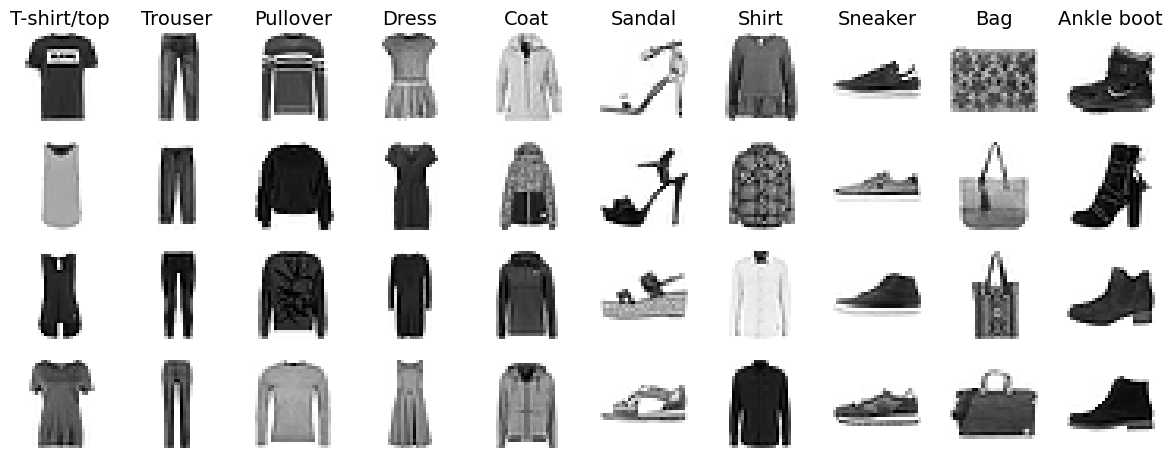

In [23]:
# extra code – this cell generates Figure 9–11
n_rows = 4
plt.figure(figsize=(12, n_rows * 1.2))
for row in range(n_rows):
    for class_index in range(10):
        X_img = X_train[y_train==class_index][row].reshape(28, 28)
        y_img = y_train[y_train==class_index][row]
        plt.subplot(n_rows, 10, 10 * row + class_index + 1)
        plt.imshow(X_img, cmap="binary", interpolation="nearest")
        plt.axis('off')
        if row == 0:
            plt.title(class_names[y_img])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("samples_in_fashion_MNIST")
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp_clf = MLPClassifier(hidden_layer_sizes=[200, 100], verbose=True,
                        early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)

Iteration 1, loss = 0.57483807
Validation score: 0.849333
Iteration 2, loss = 0.39938584
Validation score: 0.856833
Iteration 3, loss = 0.35435272
Validation score: 0.869333
Iteration 4, loss = 0.32570927
Validation score: 0.863833
Iteration 5, loss = 0.30588352
Validation score: 0.874167
Iteration 6, loss = 0.29053832
Validation score: 0.874000
Iteration 7, loss = 0.27455976
Validation score: 0.879333
Iteration 8, loss = 0.26407281
Validation score: 0.878500
Iteration 9, loss = 0.25317835
Validation score: 0.882167
Iteration 10, loss = 0.24414312
Validation score: 0.892833
Iteration 11, loss = 0.23601645
Validation score: 0.890000
Iteration 12, loss = 0.23008384
Validation score: 0.887333
Iteration 13, loss = 0.22123722
Validation score: 0.885167
Iteration 14, loss = 0.21190658
Validation score: 0.879333
Iteration 15, loss = 0.20617121
Validation score: 0.892667
Iteration 16, loss = 0.19935674
Validation score: 0.891667
Iteration 17, loss = 0.19323595
Validation score: 0.891667
Iterat

In [25]:
accuracy

0.8907

In [26]:
mlp_clf.best_validation_score_

0.8965

In [27]:
mlp_clf.score(X_test, y_test)

0.8713

In [28]:
X_new = X_test[:15]  # let's pretend these are 15 new images
mlp_clf.predict(X_new)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4])

In [29]:
y_test[:15]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4])

All these predictions are correct, except for the one at index 12, which should be a 7 (sneaker) instead of a 8 (bag).

In [30]:
y_proba = mlp_clf.predict_proba(X_new)
y_proba[12]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Hmm, that’s not great: the model is telling us that it’s 100% confident that the image represents a bag (index 8). So not only is the model wrong, it’s 100% confident that it’s right.

This code cell calculates how many predictions the `mlp_clf` model makes on the `X_test` dataset where its highest predicted probability for any class is less than 99.9% (0.999). Here's a breakdown:

*   **`y_proba = mlp_clf.predict_proba(X_test)`**: This line uses the trained `MLPClassifier` (`mlp_clf`) to predict class probabilities for each sample in the `X_test` dataset. `predict_proba` returns an array where each row corresponds to a sample, and each column corresponds to the probability that the sample belongs to that class.
*   **`y_proba.max(axis=1)`**: For each sample (row) in `y_proba`, this finds the maximum probability, which represents the model's confidence in its *most likely* prediction for that sample.
*   **`(y_proba.max(axis=1) < 0.999)`**: This creates a boolean array where `True` indicates that the model's maximum predicted probability for a given sample is less than 0.999, and `False` indicates it's 0.999 or higher.
*   **`.sum()`**: When `sum()` is called on a boolean array, `True` values are treated as `1` and `False` values as `0`. Therefore, this counts the total number of samples for which the model was less than 99.9% confident in its top prediction. The output `np.int64(24)` indicates that for 24 samples in the test set, the model's highest predicted probability was below 99.9%.

In [31]:
y_proba = mlp_clf.predict_proba(X_test)
(y_proba.max(axis=1) < 0.999).sum()

np.int64(24)

In [32]:
y_proba.max(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In fact, across all 10,000 images in the test set, there are only 16 images that the model is less than 99.9% confident about, despite the fact that its accuracy is about 90%. That’s why you should always treat estimated probabilities with a grain of salt: neural nets have a strong tendency to be overconfident, especially if they are trained for a bit too long.

In [33]:
y_proba = mlp_clf.predict_proba(X_test)
sum(y_proba.max(axis=1) < 0.99)

np.int64(16)

# Exercise solutions

## Exercises 1. to 9.

1. Visit the [TensorFlow Playground](https://playground.tensorflow.org/) and play around with it, as described in this exercise.
2. Here is a neural network based on the original artificial neurons that computes _A_ ⊕ _B_ (where ⊕ represents the exclusive OR), using the fact that _A_ ⊕ _B_ = (_A_ ∧ ¬ _B_) ∨ (¬ _A_ ∧ _B_). There are other solutions—for example, using the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ ¬(_A_ ∧ _B_), or the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ (¬ _A_ ∨ ¬ _B_), and so on.<br /><img width="70%" src="https://github.com/ageron/handson-ml3/blob/main/images/ann/exercise2.png?raw=1" />
3. A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.
4. The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.
5. Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit (ReLU) function (see Figure 9-8). See Chapter 11 for other examples, such as ELU and variants of the ReLU function.
6. Considering the MLP described in the question, composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons, where all artificial neurons use the ReLU activation function:
    * The shape of the input matrix **X** is _m_ × 10, where _m_ represents the training batch size.
    * The shape of the hidden layer's weight matrix **W**<sub>_h_</sub> is 10 × 50, and the length of its bias vector **b**<sub>_h_</sub> is 50.
    * The shape of the output layer's weight matrix **W**<sub>_o_</sub> is 50 × 3, and the length of its bias vector **b**<sub>_o_</sub> is 3.
    * The shape of the network's output matrix **Y** is _m_ × 3.
    * **Y** = ReLU(ReLU(**X** **W**<sub>_h_</sub> + **b**<sub>_h_</sub>) **W**<sub>_o_</sub> + **b**<sub>_o_</sub>). Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called _broadcasting_.
7. To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the sigmoid activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class. If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log _v_) = _v_).
8. Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix B for more details). So what's the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.
9. Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

## Exercise 10.

*Exercise: Train a deep MLP on the CoverType dataset (you can load it using `sklearn.datasets.fetch_covtype()`). See if you can get over 93% accuracy on the test set by fine-tuning the hyperparameters, manually and/or using `RandomizedSearchCV`.*

In [34]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
X_train, X_test, y_train, y_test = train_test_split(
    covtype.data, covtype.target, random_state=42)

In [35]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[200, 100, 50], early_stopping=True,
                        verbose=True, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.54176112
Validation score: 0.806751
Iteration 2, loss = 0.42014984
Validation score: 0.830847
Iteration 3, loss = 0.36860865
Validation score: 0.853589
Iteration 4, loss = 0.33598244
Validation score: 0.864536
Iteration 5, loss = 0.31272332
Validation score: 0.869768
Iteration 6, loss = 0.29537023
Validation score: 0.884111
Iteration 7, loss = 0.28015485
Validation score: 0.883284
Iteration 8, loss = 0.26937433
Validation score: 0.888126
Iteration 9, loss = 0.26004990
Validation score: 0.893129
Iteration 10, loss = 0.25201742
Validation score: 0.892188
Iteration 11, loss = 0.24352796
Validation score: 0.898476
Iteration 12, loss = 0.23721328
Validation score: 0.901941
Iteration 13, loss = 0.23194199
Validation score: 0.904053
Iteration 14, loss = 0.22549482
Validation score: 0.905567
Iteration 15, loss = 0.22150953
Validation score: 0.907770
Iteration 16, loss = 0.21765983
Validation score: 0.909606
Iteration 17, loss = 0.21269369
Validation score: 0.906462
Iterat

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=[200, 100, 50],
                               random_state=42, verbose=True))])

In [36]:
pipeline.score(X_test, y_test)

0.9325521675972269